In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-marketing/sales.csv


In [11]:
import matplotlib.pyplot as plt

In [12]:
def prepare_data(file_name_dataset):
    data = pd.read_csv(file_name_dataset)
    N = len(data)
    X = np.array([data['TV'], data['Radio'], data['Newspaper']])
    y = np.array(data['Sales'])
    return X, y

In [13]:
X, y = prepare_data('/kaggle/input/sales-marketing/sales.csv')
X.shape, y.shape

((3, 200), (200,))

In [14]:
text = 'list = [ sum ( X [0][:5]) , sum ( X [1][:5]) , sum ( X [2][:5]) , sum ( y [:5]) ]'
text.replace(' ', '')

'list=[sum(X[0][:5]),sum(X[1][:5]),sum(X[2][:5]),sum(y[:5])]'

In [15]:
list=[sum(X[0][:5]),sum(X[1][:5]),sum(X[2][:5]),sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


In [55]:
from tqdm import tqdm

def predict(X, W, b):
    return X@W + b

def compute_loss_mse(y, y_hat):
    return 0.5*np.linalg.norm(y-y_hat)

def implement_linear_regression(X_data, y_data, epoch_max = 10000, lr = 1e-5):
    losses = []
    costs = []
    W, b = np.array([0]*3), 0
    N = len(y_data)
    for epoch in tqdm(range(epoch_max)):
        for i in range(N):
            cost = 0
            X = X_data[:, i]
            y = y_data[i]
            y_hat = predict(X, W, b)
            loss = compute_loss_mse(y, y_hat)
            cost += loss
            losses.append(loss)
#             cập nhật trọng số
            W = W - 2*lr*((y_hat - y)*X)
            b = b - 2*lr*(y_hat - y)
        costs.append(cost)
    return W, b, losses, costs

W, b, losses, costs = implement_linear_regression(X, y)

100%|██████████| 10000/10000 [00:24<00:00, 401.91it/s]


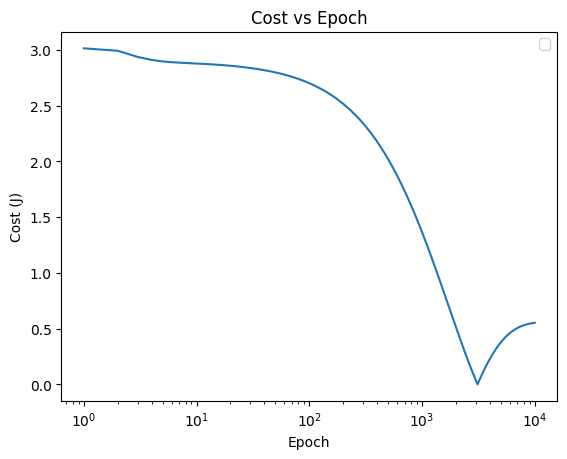

In [57]:
plt.plot(np.arange(1, 10001), costs)
plt.xscale('log')
plt.xlabel("Epoch")
plt.ylabel("Cost (J)")
plt.legend()
plt.title("Cost vs Epoch")
plt.show()